In [27]:
from pandas import read_csv
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.read_csv("E:/MEGA Downloads/50. RNN/12.1 Preparing Data For RNN/international-airline-passengers.csv",usecols=[1])

In [16]:
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [14]:
df.value_counts()

Month    International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
1949-01  112                                                                               1
1949-02  118                                                                               1
1956-09  355                                                                               1
1956-10  306                                                                               1
1956-11  271                                                                               1
                                                                                          ..
1953-01  196                                                                               1
1953-02  196                                                                               1
1953-03  236                                                                               1
1953-04  235                                                               

In [18]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [19]:
values = df.values.astype('float32')

In [23]:
values.shape

(144, 1)

In [24]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]- train_size
train = values[0:train_size]
test = values[train_size:]

In [25]:
train.shape

(96, 1)

In [26]:
test.shape

(48, 1)

In [29]:
scaler = MinMaxScaler(feature_range = (0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [33]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0]-k):
        x = data[i:i+k,0]
        y = data[i+k,0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [60]:
look_back = 12
train_X,train_Y = create_dataset(train,look_back)
test_X,test_Y = create_dataset(test,look_back)

In [61]:
train_X = np.reshape(train_X, (train_X.shape[0],train_X.shape[1],1))
test_X = np.reshape(test_X, (test_X.shape[0],test_X.shape[1],1))

In [62]:
train_X.shape

(84, 12, 1)

In [63]:
test_X.shape

(36, 12, 1)

In [39]:
import tensorflow as tf

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [66]:
model = Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = 'adam')
model.fit(train_X,train_Y,epochs = 40, batch_size = 1)

Epoch 1/40
84/84 [==============================] - 2s 9ms/step - loss: 0.2725
Epoch 2/40
84/84 [==============================] - 1s 9ms/step - loss: 0.1017
Epoch 3/40
84/84 [==============================] - 1s 9ms/step - loss: 0.0667
Epoch 4/40
84/84 [==============================] - 1s 8ms/step - loss: 0.0556
Epoch 5/40
84/84 [==============================] - 1s 9ms/step - loss: 0.0517
Epoch 6/40
84/84 [==============================] - 1s 7ms/step - loss: 0.0475
Epoch 7/40
84/84 [==============================] - 1s 8ms/step - loss: 0.0447
Epoch 8/40
84/84 [==============================] - 0s 5ms/step - loss: 0.0416
Epoch 9/40
84/84 [==============================] - 0s 5ms/step - loss: 0.0399
Epoch 10/40
84/84 [==============================] - 1s 6ms/step - loss: 0.0368
Epoch 11/40
84/84 [==============================] - 0s 5ms/step - loss: 0.0351
Epoch 12/40
84/84 [==============================] - 0s 6ms/step - loss: 0.0353
Epoch 13/40
84/84 [==============================

In [69]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 4)                 24        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [84]:
test_pred = model.predict(test_X)
test_pred = scaler.inverse_transform(test_pred).ravel()

train_pred = model.predict(train_X)
train_pred = scaler.inverse_transform(train_pred).ravel()

test_true = scaler.inverse_transform([test_Y]).ravel()
train_true = scaler.inverse_transform([train_Y]).ravel()

3/3 [==============================] - 0s 5ms/step


In [86]:
print(test_pred.shape, train_pred.shape)
print(test_true.shape, train_true.shape)

(36,) (84,)
(36,) (84,)


In [87]:
import matplotlib.pyplot as plt

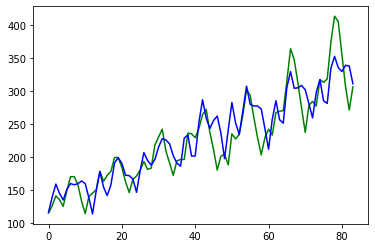

In [91]:
plt.plot(train_true, c = 'g')
plt.plot(train_pred, c = 'b')
plt.show()

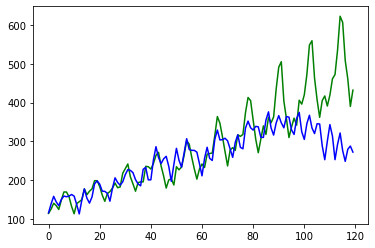

In [93]:
combinedPred = np.concatenate((train_pred,test_pred))
combinedTrue = np.concatenate((train_true,test_true))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPred, c = 'b')
plt.show()